In [59]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import cv2


In [60]:
IMAGE_SIZE = [224,224]

train_path = " "

In [61]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3] , weights = "imagenet" , include_top = False )

In [62]:
for layer in vgg.layers :
  layer.trainable =  False

In [63]:
folders = glob("/content/drive/MyDrive/Transfer_Learning")

In [64]:
x = Flatten()(vgg.output)

In [118]:
prediction = Dense(1 , activation = "sigmoid")(x)

In [119]:
model = Model(inputs = vgg.input , outputs = prediction)

In [120]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [121]:
model.compile(loss = "binary_crossentropy" , 
              optimizer = "adam" ,
              metrics = ["accuracy"])


### Make a dataframe of the cat and dog images and continue ...

In [69]:
import os

training_data = []

DATADIR = "/content/drive/MyDrive/Transfer_Learning"
CATEGORIES = ["cats" , "dogs"]

for category in CATEGORIES :
  path = os.path.join(DATADIR, category) + "/"
  class_num = CATEGORIES.index(category) 
  iter = 0

  for img in os.listdir(path) :
    iter += 1
    try :

      img_array = cv2.imread(os.path.join(path,img))
      img_array = cv2.resize(img_array , tuple(IMAGE_SIZE))
      training_data.append([img_array , class_num])
    except :
      print(len(training_data))
      print(os.path.join(path,img))
    if iter > 1000 :
      break

print(len(training_data))


2002


In [70]:
print(len(training_data))

2002


dogs


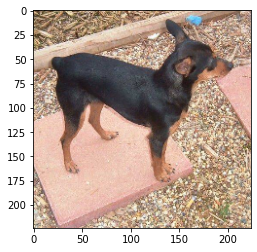

In [71]:
import random

i = random.randint(0,2002)

new_image = training_data[i][0]
print(CATEGORIES[training_data[i][1]])
new_image = cv2.cvtColor(new_image , cv2.COLOR_RGB2BGR)
plt.imshow(new_image , )

In [72]:
np.array(training_data[0][0]).shape

(224, 224, 3)

In [73]:
X = []
y = []

for i in training_data :
  feature  , label = i[0] , i[1]
  X.append(feature)
  y.append(label)

#X = np.array(X).reshape(-1 , 224 , 224 , 3)

In [74]:
np.array(X).shape

(2002, 224, 224, 3)

In [75]:
import tensorflow as tf
#tf.math.reduce_max(tf.constant(X))

In [76]:
import tensorflow as tf

#X = tf.constant(X , dtype = tf.float64)/255.0

In [77]:
#X = tf.divide(tf.constant(X , dtype = tf.float64), tf.constant(tf.fill(np.array(X).shape , 255.0 ) , dtype = tf.float64) )

In [78]:
X = np.array(X)

In [79]:
#tf.math.reduce_max(X)

In [80]:
pd.DataFrame(y).value_counts()

0    1001
1    1001
dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2)

In [82]:
import tensorflow as tf


X_train , y_train = tf.constant(X_train , dtype = tf.float64) , tf.constant(y_train , dtype = tf.float64)
X_test , y_test = tf.constant(X_test , dtype = tf.float64) , tf.constant(y_test , dtype = tf.float64)

In [83]:
len(X_train) , len(y_train)

(1601, 1601)

In [84]:
len(X_test) , len(y_test)

(401, 401)

In [85]:
#training_set = pd.concat([pd.DataFrame(X_train) , pd.DataFrame(y_train)] , axis = 1)
#test_set = pd.concat([X_test , y_test] , axis = 1)

In [86]:
'''r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epoch = 5,
    steps_per_epoch = len(training_set),
    validation_setps = len(test_set)
)'''

'r = model.fit_generator(\n    training_set,\n    validation_data = test_set,\n    epoch = 5,\n    steps_per_epoch = len(training_set),\n    validation_setps = len(test_set)\n)'

In [87]:
print(X_train.shape)
print(y_train.shape)

(1601, 224, 224, 3)
(1601,)


In [88]:
 model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [89]:
print(pd.DataFrame(y).value_counts())

0    1001
1    1001
dtype: int64


In [90]:
y_train = np.asarray(y_train).astype('float64').reshape((-1,1))
y_test = np.asarray(y_test).astype('float64').reshape((-1,1))

In [91]:
X_train.shape

TensorShape([1601, 224, 224, 3])

cats


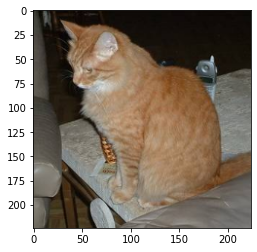

In [116]:
i = 1100

test_img = X_train[i]
test_img = cv2.cvtColor(np.uint16(test_img) , cv2.COLOR_RGB2BGR)
#np.max(test_img) , np.min(test_img)

print(CATEGORIES[int(y_train[i])])
plt.imshow(test_img)


In [ ]:
'''
test_img = cv2.cvtColor(test_img , cv2.COLOR_RGB2BGR)
print(CATEGORIES[int(y_train[i])])
plt.imshow(test_img  ,cmap="gray") '''

In [122]:
r = model.fit(X_train , y_train , epochs = 10)

Epoch 1/10
51/51 [==============================] - 16s 298ms/step - loss: 1.2961 - accuracy: 0.9244
Epoch 2/10
51/51 [==============================] - 15s 297ms/step - loss: 0.2584 - accuracy: 0.9831
Epoch 3/10
51/51 [==============================] - 15s 297ms/step - loss: 0.1008 - accuracy: 0.9913
Epoch 4/10
51/51 [==============================] - 15s 297ms/step - loss: 0.2517 - accuracy: 0.9863
Epoch 5/10
51/51 [==============================] - 15s 297ms/step - loss: 0.0671 - accuracy: 0.9944
Epoch 6/10
51/51 [==============================] - 15s 297ms/step - loss: 0.0054 - accuracy: 0.9988
Epoch 7/10
51/51 [==============================] - 15s 297ms/step - loss: 2.7559e-04 - accuracy: 1.0000
Epoch 8/10
51/51 [==============================] - 15s 297ms/step - loss: 1.6262e-06 - accuracy: 1.0000
Epoch 9/10
51/51 [==============================] - 15s 297ms/step - loss: 3.7309e-07 - accuracy: 1.0000
Epoch 10/10
51/51 [==============================] - 15s 297ms/step - loss: 2.5

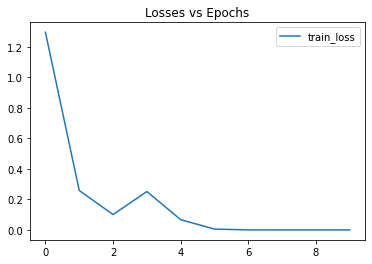

In [125]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'] , label  ="train_loss")
#plt.plot(r.history["val_loss"] , label = "val_loss")
plt.legend()
plt.title("Losses vs Epochs")
plt.show()


In [126]:
from keras.models import load_model
model.save('transfer_learning.h5')